## Imports

In [9]:
# Standard
import json
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Scoring
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump, load


## Data

In [6]:
file_name = 'train_gb'
train = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

file_name = 'test_gb'
test = pd.read_pickle(f'..\\processed_data\\{file_name}.pki')

In [7]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis = 1)
y = train['Loan_Status']
print(X.head())
print(y.head())

     Gender  Married Dependents  Education  Self_Employed  Credit_History  \
205       0        0          0          1              0             1.0   
238       0        0          1          0              0             1.0   
25        1        1          0          0              1             1.0   
527       1        1          1          1              0             0.0   
256       1        0          0          1              0             0.0   

     Property_Area  TotalIncome       EMI  BalanceIncome  
205              1       4408.0  0.333333    4407.666667  
238              0       3812.0  0.311111    3811.688889  
25               1       9560.0  0.530556    9559.469444  
527              1       6715.0  0.447222    6714.552778  
256              0       6045.0  0.319444    6044.680556  
205    1
238    1
25     1
527    1
256    0
Name: Loan_Status, dtype: int32


In [8]:
y.value_counts()

Loan_Status
1    304
0    143
Name: count, dtype: int64

## Hyper-parameter training Extra Trees

In [114]:
# Find the Best Model
param_grid = {
    'base_estimator__n_estimators': [50, 100],
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_features': ['sqrt', 'log2'],
    'base_estimator__min_samples_leaf' : [3, 4, 5]
}

grid_search = GridSearchCV(BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample', oob_score=True), n_estimators=50), param_grid=param_grid, cv=5,scoring='f1_weighted', verbose=5, n_jobs=-1)
grid_search.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\gs457\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=True,
                                                                             class_weight='balanced_subsample',
                                                                             oob_score=True),
                                         n_estimators=50),
             n_jobs=-1,
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__max_features': ['sqrt', 'log2'],
                         'base_estimator__min_samples_leaf': [3, 4, 5],
                         'base_estimator__n_estimators': [50, 100, 200]},
             scoring='f1_weighted', verbose=5)

In [115]:
grid_search.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_features': 'log2',
 'base_estimator__min_samples_leaf': 3,
 'base_estimator__n_estimators': 50}

In [116]:
model = grid_search.best_estimator_

In [117]:
model.fit(X, y)

C:\Users\gs457\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=True,
                                                      class_weight='balanced_subsample',
                                                      max_features='log2',
                                                      min_samples_leaf=3,
                                                      n_estimators=50,
                                                      oob_score=True),
                  n_estimators=50)

In [88]:
file_name = 'et_model'
dump(model, f'..\\ml_models\\{file_name}.joblib')

['..\\ml_models\\et_model.joblib']

## Scoring

In [118]:
X_test, y_test = test.drop(columns=['Loan_ID', 'Loan_Status']), test['Loan_Status']

In [119]:
y_pred = model.predict(X_test)

In [120]:
f1_score(y_pred = y_pred, y_true=y_test)

0.8596491228070176

In [121]:
accuracy_score(y_pred = y_pred, y_true=y_test)

0.7922077922077922

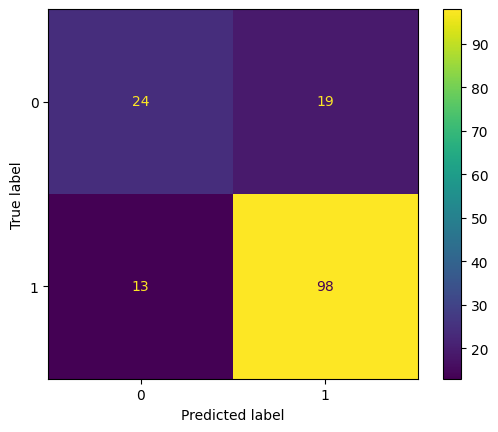

In [122]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred = y_pred, y_true=y_test), display_labels=model.classes_)
disp.plot()
plt.show()